In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras import layers, models
from keras.datasets import mnist

%matplotlib inline

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

In [ ]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [ ]:
def plot_img(x):
    fig = plt.figure(figsize=(18, 18))

    for i in range(x.shape[0]):
      ax = fig.add_subplot(10, 10, i+1, xticks=[], yticks=[])
      ax.imshow(x[i], cmap="gray")

## Encoder

In [ ]:

input_layer = layers.Input((28, 28, 1))

layer_1 = layers.Conv2D(16, kernel_size=(2, 2), padding='same', activation="relu")(input_layer)
layer_1 = layers.MaxPool2D(pool_size=2)(layer_1)
layer_1 = layers.Conv2D(32, kernel_size=(2, 2), padding='same', activation="relu")(layer_1)
encoded = layers.MaxPool2D(pool_size=2)(layer_1)

layer_1 = layers.Conv2D(16, kernel_size=(2, 2), padding='same', activation="relu")(encoded)
layer_1 = layers.UpSampling2D(size=2)(layer_1)
layer_1 = layers.Conv2D(32, kernel_size=(2, 2), padding='same', activation="relu")(layer_1)
layer_1 = layers.UpSampling2D(size=2)(layer_1)
decoded = layers.Conv2D(1, kernel_size=(2, 2), padding='same', activation="sigmoid")(layer_1)


In [ ]:
encoder = models.Model(input_layer, encoded)
decoder = models.Model(encoded, decoded)

In [ ]:
autoencoder = models.Model(input_layer, decoded)
autoencoder.compile(optimizer="sgd", loss="binary_crossentropy")

In [ ]:
autoencoder.fit(x_train, x_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.2967
Epoch 2/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.1744
Epoch 3/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.1619
Epoch 4/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.1538
Epoch 5/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.1469
Epoch 6/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.1416
Epoch 7/10
1875/1875 [==============================] - 55s 30ms/step - loss: 0.1371
Epoch 8/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.1330
Epoch 9/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.1293
Epoch 10/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1261


In [ ]:
x_pred = encoder.predict(x_test).squeeze()

313/313 [==============================] - 1s 4ms/step


In [ ]:
img = np.zeros((7, 7))

for i in range(32):
  img += x_pred[3][:, :, i]

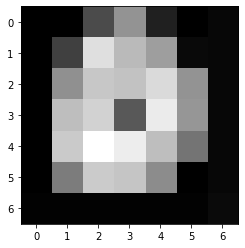

In [ ]:
plt.imshow(img, cmap="gray")

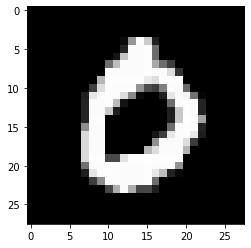

In [ ]:
plt.imshow(x_test[3], cmap="gray")